<a href="https://colab.research.google.com/github/Visha17/SPARKS-FOUNDATION-T2/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction using Unsupervised ML**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
print(iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
print(iris.shape)

(150, 4)


**DATA ANALYSIS**

In [ ]:
X = dataset.data
y = dataset.target

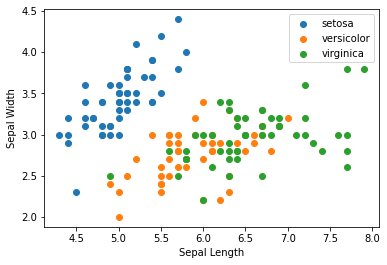

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label = 'setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label = 'virginica')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

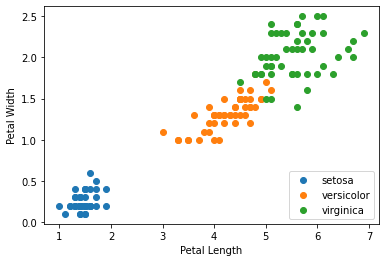

In [ ]:
plt.scatter(X[y == 0, 2], X[y == 0, 3], label = 'setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], label = 'versicolor')
plt.scatter(X[y == 2, 2], X[y == 2, 3], label = 'virginica')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

**OPTIMAL CLUSTERS**

In [ ]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
sse

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.25600931571816,
 46.47223015873017,
 39.066035353535355,
 34.40900974025975,
 30.06459307359308,
 28.02497681266103]

Text(0, 0.5, 'Sum of Squared Error (SSE)')

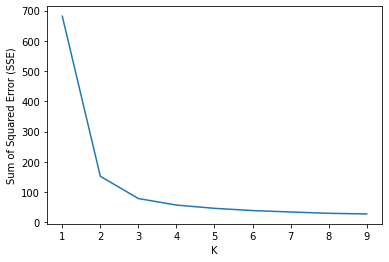

In [ ]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')

In [ ]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)

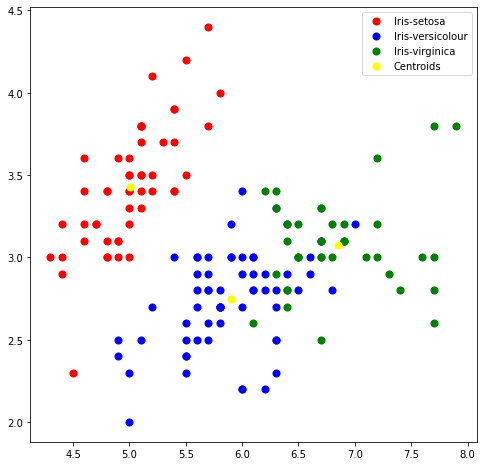

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()